In [27]:
from dotenv import load_dotenv
import os
from sqlalchemy import create_engine

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
load_dotenv()  # loads .env file

db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv('DB_HOST')
db_name = os.getenv('DB_NAME')

In [29]:
connection_string = f'postgresql://{db_user}:{db_password}@{db_host}/{db_name}'
engine = create_engine(connection_string)

In [ ]:
try:
    query = """
     SELECT
	*
    FROM
        precificacao.precificacao_ce

    UNION

    SELECT *
    FROM precificacao.precificacao_ba;
    """
    df = pd.read_sql(query, engine)
    
    print(f"Loaded {len(df)} rows")
    
finally:
    engine.dispose()  # Close connections

Loaded 75 rows


In [46]:
df

,fid,geom,CD_MUN,NM_MUN,SIGLA_UF,ckey,populacao,nota_veg,nota_area,nota_relevo,...,perimetro_total_car,perimetro_medio_car,area_max_perim,nota_total_q1,nota_total_q2,nota_total_q3,nota_total_q4,nota_media,valor_mun_perim,valor_mun_area
0,1,0106000020F816000001000000010300000001000000C9...,2802700,ilha das flores,SE,ilha das flores se,8314.0,2.294434,4.583536,2.5,...,466.84247,1.24160,12.267429,16.0,21.0,17.0,18.0,18.0,4.187717e+05,3.199499e+05
1,7,0106000020F816000001000000010300000001000000A6...,2804102,moita bonita,SE,moita bonita se,11046.0,2.159275,9.106948,4.5,...,1417.58896,0.77001,4.718271,25.0,29.0,25.0,27.0,26.0,2.227940e+06,1.019344e+06
2,8,0106000020F81600000100000001030000000100000015...,2801900,cumbe,SE,cumbe se,3818.0,2.086216,4.024757,4.5,...,938.15613,1.77345,25.028109,18.0,22.0,18.0,20.0,20.0,8.415542e+05,7.931035e+05
3,9,0106000020F816000001000000010300000001000000FA...,2800670,boquim,SE,boquim se,24592.0,2.105410,7.774936,4.5,...,1982.20679,0.98519,7.723784,21.0,26.0,22.0,23.0,23.0,1.778099e+06,1.234806e+06
4,16,0106000020F8160000010000000103000000010000008D...,2800704,brejo grande,SE,brejo grande se,7824.0,2.542831,4.573727,2.5,...,712.60875,1.87529,27.985110,16.0,22.0,17.0,18.0,18.0,6.392314e+05,8.769902e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,65,0106000020F81600000100000001030000000100000092...,2806107,rosario do catete,SE,rosario do catete se,9275.0,2.286546,1.002461,4.5,...,401.76144,3.24001,83.537762,14.0,19.0,15.0,16.0,16.0,3.603921e+05,6.260449e+05
71,66,0106000020F8160000010000000103000000010000003D...,2803906,malhador,SE,malhador se,11523.0,2.487554,5.131174,7.5,...,951.36734,1.08356,9.343209,25.0,30.0,26.0,27.0,27.0,1.495207e+06,1.084842e+06
72,67,0106000020F8160000010000000103000000010000005C...,2807402,tobias barreto,SE,tobias barreto se,50267.0,2.231050,5.055400,2.5,...,9835.74106,1.51974,18.379290,16.0,20.0,17.0,18.0,18.0,8.822955e+06,6.313287e+06
73,68,0106000020F816000001000000010300000001000000CC...,2802601,graccho cardoso,SE,graccho cardoso se,5821.0,2.127238,4.755253,4.5,...,2445.39560,1.63135,21.177975,18.0,22.0,19.0,20.0,20.0,2.193593e+06,1.512191e+06


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fid                  75 non-null     int64  
 1   geom                 75 non-null     object 
 2   CD_MUN               75 non-null     int64  
 3   NM_MUN               75 non-null     object 
 4   SIGLA_UF             75 non-null     object 
 5   ckey                 75 non-null     object 
 6   populacao            75 non-null     float64
 7   nota_veg             75 non-null     float64
 8   nota_area            75 non-null     float64
 9   nota_relevo          75 non-null     float64
 10  nota_p_q1            75 non-null     float64
 11  nota_p_q2            75 non-null     float64
 12  nota_p_q3            75 non-null     float64
 13  nota_p_q4            75 non-null     float64
 14  nota_insalub         75 non-null     float64
 15  nota_insalub_2       75 non-null     float

In [48]:
df_temp = df.copy()

In [49]:
df.columns

Index(['fid', 'geom', 'CD_MUN', 'NM_MUN', 'SIGLA_UF', 'ckey', 'populacao',
       'nota_veg', 'nota_area', 'nota_relevo', 'nota_p_q1', 'nota_p_q2',
       'nota_p_q3', 'nota_p_q4', 'nota_insalub', 'nota_insalub_2',
       'area_municip', 'area_georef', 'percent_area_georef', 'num_imoveis',
       'area_car_total', 'area_car_media', 'perimetro_total_car',
       'perimetro_medio_car', 'area_max_perim', 'nota_total_q1',
       'nota_total_q2', 'nota_total_q3', 'nota_total_q4', 'nota_media',
       'valor_mun_perim', 'valor_mun_area'],
      dtype='object')

In [50]:
df_temp = df_temp[['fid', 'CD_MUN', 'NM_MUN', 'SIGLA_UF', 'ckey', 'populacao',
       'nota_veg', 'nota_area', 'nota_relevo', 'nota_p_q1', 'nota_p_q2',
       'nota_p_q3', 'nota_p_q4', 'nota_insalub', 'nota_insalub_2',
       'area_municip', 'area_georef', 'percent_area_georef', 'num_imoveis',
       'area_car_total', 'area_car_media', 'perimetro_total_car',
       'perimetro_medio_car', 'area_max_perim', 'nota_total_q1',
       'nota_total_q2', 'nota_total_q3', 'nota_total_q4', 'nota_media',
       'valor_mun_perim', 'valor_mun_area']]

In [5]:
df.describe()

,Unnamed: 0,CD_MUN,populacao,nota_veg,nota_area,nota_relevo,nota_p_q1,nota_p_q2,nota_p_q3,nota_p_q4,...,nota_total_q1,nota_total_q2,nota_total_q3,nota_total_q4,nota_media,valor_mun_perim,valor_mun_area,valor_medio,valor_medio_car,val_med_car_perim
count,102.000000,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02,1.020000e+02,1.020000e+02,102.000000,102.000000
mean,50.500000,2.704783e+06,30562.205882,2.320099,4.539290,5.254902,4.575002,8.950211,5.332094,6.212249,...,19.039216,23.421569,19.745098,20.686275,20.794118,1.768405e+06,1.677852e+06,1.723128e+06,2768.877687,2231.944941
std,29.588849,2.738851e+03,96008.035557,0.358340,2.273152,1.890237,0.051595,0.844428,0.402178,0.280245,...,2.856022,2.840430,2.827329,2.803747,2.762329,1.511645e+06,1.139185e+06,1.231963e+06,3385.789935,1605.458853
min,0.000000,2.700102e+06,2715.000000,2.085295,1.000000,1.500000,4.502578,6.690501,4.237876,5.703602,...,12.000000,17.000000,13.000000,13.000000,14.000000,9.296805e+04,1.743762e+05,1.411110e+05,204.000265,790.339488
25%,25.250000,2.702430e+06,8982.750000,2.161125,2.742094,4.500000,4.537079,8.401423,5.091686,5.979270,...,18.000000,21.000000,18.000000,20.000000,19.000000,7.198605e+05,7.651194e+05,8.700723e+05,609.033123,1184.044007
50%,50.500000,2.704758e+06,15383.000000,2.256122,4.254028,4.500000,4.560417,9.145737,5.439664,6.202008,...,19.000000,24.000000,20.000000,21.000000,21.000000,1.187637e+06,1.521632e+06,1.420533e+06,1226.271022,1571.125862
75%,75.750000,2.707082e+06,23987.500000,2.405242,7.053381,7.500000,4.602380,9.622456,5.658844,6.421113,...,21.000000,25.000000,22.000000,23.000000,22.000000,2.397629e+06,2.053376e+06,2.328160e+06,3801.309359,2610.901658
max,101.000000,2.709400e+06,953326.000000,5.529951,9.106353,7.500000,4.710905,10.000000,5.811479,6.838312,...,28.000000,33.000000,29.000000,29.000000,30.000000,6.875490e+06,5.635363e+06,6.255427e+06,18649.593806,9052.573254


In [20]:
# 1. Verificar outliers
df.describe().T[['mean', 'std', 'min', 'max']]


,mean,std,min,max
fid,9.250000e+01,5.326037e+01,1.000000e+00,1.840000e+02
CD_MUN,2.307039e+06,4.038662e+03,2.300101e+06,2.314102e+06
populacao,4.767117e+04,1.814153e+05,4.840000e+03,2.424880e+06
nota_veg,5.887663e+00,1.766427e+00,2.281013e+00,9.869525e+00
nota_area,3.981098e+00,1.789536e+00,1.000000e+00,9.360338e+00
nota_relevo,3.831522e+00,1.617488e+00,2.500000e+00,7.500000e+00
nota_p_q1,8.149259e+00,7.020453e-01,7.186750e+00,1.000000e+01
nota_p_q2,7.319568e+00,9.812764e-01,4.389958e+00,9.716276e+00
nota_p_q3,5.204066e+00,5.533584e-01,3.542112e+00,6.319625e+00
nota_p_q4,6.951678e+00,1.266498e+00,5.446485e+00,9.972529e+00


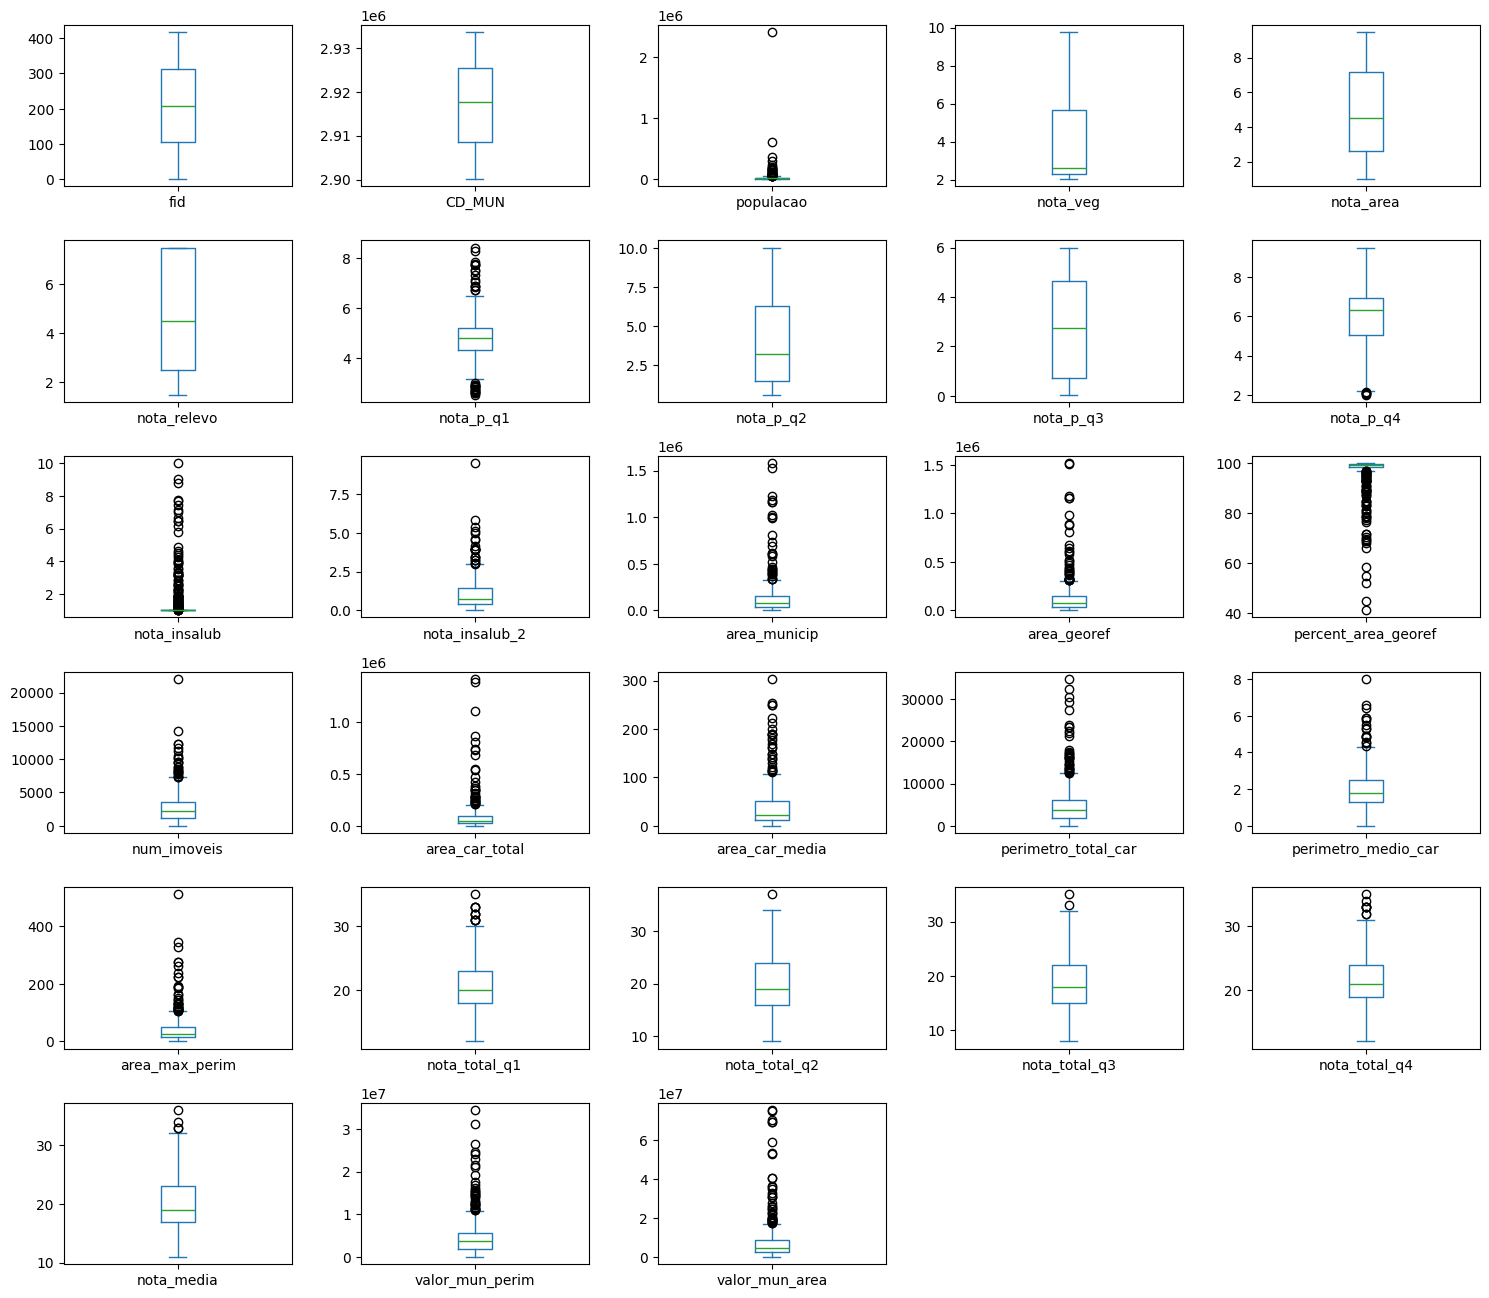

In [44]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].plot(kind='box', subplots=True, layout=(7,5), figsize=(15,15), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

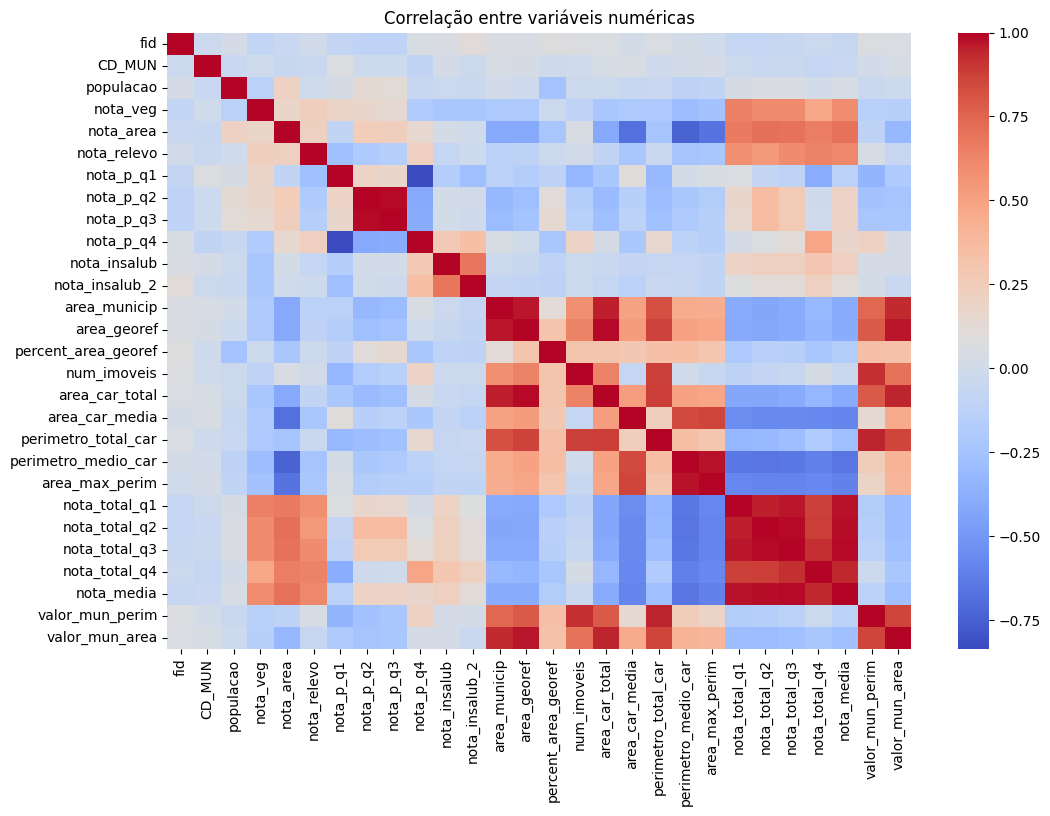

In [26]:
# 3. Correlação entre variáveis numéricas
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', annot=False)
plt.title('Correlação entre variáveis numéricas')
plt.show()
